# Algoritmo DBSCAN

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo DBSCAN](#implementação-do-algoritmo)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [13]:
from utils.alterar_dataset import preencher_valores_faltantes_linha, deletar_valores_absurdos
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
from utils.distancias import ajustar_distancias
from utils.parametros import ParametrosDBSCAN
from matplotlib import pyplot as plt
from models.dbscan import Dbscan
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [8]:
df_funcao_renal = pd.read_csv("../databases/raw/InputFuncaoRenal.csv", sep = ",", index_col = "subject_id")
df_dieta_grupos = pd.read_csv("../databases/raw/dva_dieta_grupos.csv", sep = ",", index_col = "subject_id")
df_perfil_hepatico = pd.read_csv("../databases/raw/InputPerfilHepatico.csv", sep = ",", index_col = "subject_id")
df_ureia = pd.read_csv("../databases/processed/ureia_pivoted.csv", sep = ",", index_col = "subject_id")
df_creatinina = pd.read_csv("../databases/processed/creatinina_pivoted.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

In [9]:
lista_de_epocas = [i for i in np.arange(0.2, 1.5, 0.1)]
lista_peso_minimo = [i for i in range(2, 21)]
lista_tamanho_folha = [i for i in range(20, 60, 10)]
lista_parametro_minkowski = [1.0, 2.0, 4.0]
lista_metrica = ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]
lista_algoritmo = ["auto", "ball_tree", "kd_tree", "brute"]

### DATASET Funcao Renal

#### Testes com iteração por laço `for` utilizando diferentes parâmetros

In [4]:
modelos = []

for nro_epocas in lista_de_epocas:
    dbscan = Dbscan(epocas = nro_epocas)
    dbscan.fit(df_funcao_renal.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_funcao_renal.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com época = ", round(modelo._epocas_, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com época =  0.2
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.3
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.4
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.5
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.6
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.7
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.8
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.9
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.0
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  

In [5]:
modelos = []

for peso_minimo in lista_peso_minimo:
    dbscan = Dbscan(epocas = 0.5,
                    peso_minimo = peso_minimo)
    dbscan.fit(df_funcao_renal.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_funcao_renal.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com peso mínimo = ", round(modelo._peso_minimo_, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com peso mínimo =  2
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  3
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  4
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  5
Númber estimado  de clusteres: 25
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  6
Númber estimado  de clusteres: 24
Número estimado de pontos considerados ruídos: 5


Modelo com peso mínimo =  7
Númber estimado  de clusteres: 24
Número estimado de pontos considerados ruídos: 5


Modelo com peso mínimo =  8
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com peso mínimo =  9
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com peso mínimo =  10
Númber estimado  de clusteres: 23
Número estimado de pontos consi

In [6]:
modelos = []

for p in lista_parametro_minkowski:
    dbscan = Dbscan(epocas = 0.5,
                    peso_minimo = 8,
                    metrica = "minkowski",
                    metrica_minkowski = p)
    dbscan.fit(df_funcao_renal.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_funcao_renal.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com p = ", round(modelo._metrica_minkowski_, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com p =  1.0
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com p =  2.0
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com p =  4.0
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12




In [7]:
modelos = []

for metrica in lista_metrica:
    dbscan = Dbscan(epocas = 0.5,
                    peso_minimo = 8,
                    metrica = metrica)
    dbscan.fit(df_funcao_renal.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_funcao_renal.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com métrica = ", modelo._metrica_)
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com métrica =  cityblock
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com métrica =  cosine
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 3772


Modelo com métrica =  euclidean
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com métrica =  l1
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com métrica =  l2
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com métrica =  manhattan
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12




In [8]:
modelos = []

for algoritmo in lista_algoritmo:
    for tam_folha in lista_tamanho_folha:
        dbscan = Dbscan(epocas = 0.5,
                        peso_minimo = 8,
                        algoritmo = algoritmo,
                        metrica = "euclidean",
                        tamanho_folha = tam_folha)
        dbscan.fit(df_funcao_renal.values)
        modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_funcao_renal.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com algoritmo = ", modelo._algoritmo_)
    print("Modelo com tamanho de folha = ", modelo._tamanho_folha_)
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com algoritmo =  auto
Modelo com tamanho de folha =  20
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  30
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  40
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  50
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  20
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  30
Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  40
Númber estimado  de clustere

#### Imprimindo o resultado dos testes

In [9]:
dbscan = Dbscan(epocas = 0.5,
                peso_minimo = 8,
                algoritmo = "kd_tree",
                metrica = "euclidean",
                tamanho_folha = 80)
dbscan.fit(df_funcao_renal.values)
modelos.append(dbscan)
print("Númber estimado  de clusteres: %d" % qtd_clusters_)
print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)

Númber estimado  de clusteres: 23
Número estimado de pontos considerados ruídos: 12


### DATASET Dieta Grupos

#### Testes com iteração por laço `for` utilizando diferentes parâmetros

In [13]:
modelos = []

for nro_epocas in lista_de_epocas:
    dbscan = Dbscan(epocas = nro_epocas)
    dbscan.fit(df_dieta_grupos.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_dieta_grupos.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com época = ", round(modelo._epocas_, 1))
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com época =  0.2
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3226


Modelo com época =  0.3
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3216


Modelo com época =  0.4
Númber estimado  de clusteres: 4
Número estimado de pontos considerados ruídos: 3203


Modelo com época =  0.5
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 3176


Modelo com época =  0.6
Númber estimado  de clusteres: 4
Número estimado de pontos considerados ruídos: 3170


Modelo com época =  0.7
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 3157


Modelo com época =  0.8
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 3134


Modelo com época =  0.9
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 3124


Modelo com época =  1.0
Númber estimado  de clusteres: 6
Número estimado de pontos considerados ruídos: 3108


M

In [14]:
modelos = []

for peso_minimo in lista_peso_minimo:
    dbscan = Dbscan(epocas = 1.4,
                    peso_minimo = peso_minimo)
    dbscan.fit(df_dieta_grupos.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_dieta_grupos.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com peso mínimo = ", round(modelo._peso_minimo_, 1))
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com peso mínimo =  2
Númber estimado  de clusteres: 17
Número estimado de pontos considerados ruídos: 2974


Modelo com peso mínimo =  3
Númber estimado  de clusteres: 8
Número estimado de pontos considerados ruídos: 2992


Modelo com peso mínimo =  4
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3011


Modelo com peso mínimo =  5
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 3017


Modelo com peso mínimo =  6
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 3027


Modelo com peso mínimo =  7
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 3032


Modelo com peso mínimo =  8
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 3036


Modelo com peso mínimo =  9
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 3037


Modelo com peso mínimo =  10
Númber estimado  de clusteres: 2
Número estimado d

In [22]:
modelos = []

for p in lista_parametro_minkowski:
    dbscan = Dbscan(epocas = 1.4,
                    peso_minimo = 4,
                    metrica = "minkowski",
                    metrica_minkowski = p)
    dbscan.fit(df_dieta_grupos.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_dieta_grupos.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com p = ", round(modelo._metrica_minkowski_, 1))
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com p =  1.0
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3142


Modelo com p =  2.0
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3011


Modelo com p =  4.0
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 2864




In [16]:
modelos = []

for metrica in lista_metrica:
    dbscan = Dbscan(epocas = 1.4,
                    peso_minimo = 4,
                    metrica = metrica)
    dbscan.fit(df_dieta_grupos.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_dieta_grupos.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com métrica = ", modelo._metrica_)
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com métrica =  cityblock
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3142


Modelo com métrica =  cosine
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  euclidean
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3011


Modelo com métrica =  l1
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3142


Modelo com métrica =  l2
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3011


Modelo com métrica =  manhattan
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3142




In [20]:
modelos = []

for algoritmo in lista_algoritmo:
    for tam_folha in lista_tamanho_folha:
        dbscan = Dbscan(epocas = 1.4,
                        peso_minimo = 4,
                        algoritmo = algoritmo,
                        metrica = "euclidean",
                        tamanho_folha = tam_folha)
        dbscan.fit(df_dieta_grupos.values)
        modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_dieta_grupos.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com algoritmo = ", modelo._algoritmo_)
    print("Modelo com tamanho de folha = ", modelo._tamanho_folha_)
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com algoritmo =  auto
Modelo com tamanho de folha =  20
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3011


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  30
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3011


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  40
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3011


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  50
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3011


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  20
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3011


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  30
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 3011


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  40
Númber estimado  de cl

#### Imprimindo o resultado dos testes

In [23]:
dbscan = Dbscan(epocas = 1.4,
                peso_minimo = 4,
                algoritmo = "brute",
                metrica = "minkowski",
                metrica_minkowski = 4,
                nro_threads = -1)
dbscan.fit(df_funcao_renal.values)
modelos.append(dbscan)
print("Númber estimado  de clusteres: %d" % qtd_clusters_)
print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)

Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 2864


### DATASET Perfil Hepatico

In [24]:
modelos = []

for nro_epocas in lista_de_epocas:
    dbscan = Dbscan(epocas = nro_epocas)
    dbscan.fit(df_perfil_hepatico.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_perfil_hepatico.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com época = ", round(modelo._epocas_, 1))
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com época =  0.2
Númber estimado  de clusteres: 150
Número estimado de pontos considerados ruídos: 448


Modelo com época =  0.3
Númber estimado  de clusteres: 150
Número estimado de pontos considerados ruídos: 448


Modelo com época =  0.4
Númber estimado  de clusteres: 150
Número estimado de pontos considerados ruídos: 448


Modelo com época =  0.5
Númber estimado  de clusteres: 150
Número estimado de pontos considerados ruídos: 448


Modelo com época =  0.6
Númber estimado  de clusteres: 150
Número estimado de pontos considerados ruídos: 448


Modelo com época =  0.7
Númber estimado  de clusteres: 150
Número estimado de pontos considerados ruídos: 448


Modelo com época =  0.8
Númber estimado  de clusteres: 150
Número estimado de pontos considerados ruídos: 448


Modelo com época =  0.9
Númber estimado  de clusteres: 150
Número estimado de pontos considerados ruídos: 448


Modelo com época =  1.0
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 

In [36]:
modelos = []

for peso_minimo in lista_peso_minimo:
    dbscan = Dbscan(epocas = 1.0,
                    peso_minimo = peso_minimo)
    dbscan.fit(df_perfil_hepatico.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_perfil_hepatico.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com peso mínimo = ", round(modelo._peso_minimo_, 1))
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com peso mínimo =  2
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com peso mínimo =  3
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 13


Modelo com peso mínimo =  4
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 13


Modelo com peso mínimo =  5
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 13


Modelo com peso mínimo =  6
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 15


Modelo com peso mínimo =  7
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 18


Modelo com peso mínimo =  8
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 21


Modelo com peso mínimo =  9
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 22


Modelo com peso mínimo =  10
Númber estimado  de clusteres: 1
Número estimado de pontos consider

In [37]:
modelos = []

for p in lista_parametro_minkowski:
    dbscan = Dbscan(epocas = 1.0,
                    peso_minimo = 2,
                    metrica = "minkowski",
                    metrica_minkowski = p)
    dbscan.fit(df_perfil_hepatico.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_perfil_hepatico.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com p = ", round(modelo._metrica_minkowski_, 1))
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com p =  1.0
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com p =  2.0
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com p =  4.0
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11




In [38]:
modelos = []

for metrica in lista_metrica:
    dbscan = Dbscan(epocas = 1.0,
                    peso_minimo = 2,
                    metrica = metrica)
    dbscan.fit(df_perfil_hepatico.values)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_perfil_hepatico.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com métrica = ", modelo._metrica_)
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com métrica =  cityblock
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com métrica =  cosine
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  euclidean
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com métrica =  l1
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com métrica =  l2
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com métrica =  manhattan
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11




In [41]:
modelos = []

for algoritmo in lista_algoritmo:
    for tam_folha in lista_tamanho_folha:
        dbscan = Dbscan(epocas = 1.0,
                        peso_minimo = 2,
                        algoritmo = algoritmo,
                        metrica = "euclidean",
                        tamanho_folha = tam_folha)
        dbscan.fit(df_perfil_hepatico.values)
        modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(df_perfil_hepatico.values)
    y_dbscan = modelo.getDistanciaAoQuadrado()
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com algoritmo = ", modelo._algoritmo_)
    print("Modelo com tamanho de folha = ", modelo._tamanho_folha_)
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com algoritmo =  auto
Modelo com tamanho de folha =  20
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  30
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  40
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  50
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  20
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  30
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  40
Númber estimado  de clusteres: 2
N

#### Imprimindo o resultado dos testes

In [42]:
dbscan = Dbscan(epocas = 1.0,
                peso_minimo = 2,
                algoritmo = "auto",
                metrica = "euclidean",
                nro_threads = -1)
dbscan.fit(df_perfil_hepatico.values)
modelos.append(dbscan)
print("Número estimado  de clusteres: %d" % qtd_clusters_)
print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)

Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 11


### DATASET ureia

#### Removendo valores outliers do dataset e os substituindo por `np.nan`

In [14]:
novo_df_ureia_tratado = deletar_valores_absurdos(df_ureia, df_ureia.max().max())
novo_df_ureia_tratado.max()

ureia_dia_1    212.0
ureia_dia_2    162.0
ureia_dia_3    171.0
ureia_dia_4    184.0
ureia_dia_5    182.0
ureia_dia_6    206.0
ureia_dia_7    195.0
dtype: float64

#### Iterando pelo dataset e inserindo dados de dias anteriores em dias posteriores que contém dados nulos

In [15]:
novo_df_ureia_tratado = preencher_valores_faltantes_linha(novo_df_ureia_tratado)
novo_df_ureia_tratado.head(10)

,ureia_dia_1,ureia_dia_2,ureia_dia_3,ureia_dia_4,ureia_dia_5,ureia_dia_6,ureia_dia_7
subject_id,,,,,,,
10001884,30.0,30.0,38.0,31.0,26.0,22.0,14.0
10004422,21.0,13.0,17.0,16.0,20.0,24.0,24.0
10004733,44.0,41.0,39.0,37.0,28.0,26.0,28.0
10005606,6.0,6.0,10.0,6.0,11.0,11.0,15.0
10010867,8.0,5.0,5.0,5.0,6.0,7.0,9.0
10019777,17.0,22.0,16.0,19.0,18.0,17.0,16.0
10020944,34.0,28.0,26.0,22.0,21.0,20.0,19.0
10023486,42.0,48.0,54.0,63.0,68.0,69.0,70.0
10032381,9.0,9.0,9.0,14.0,21.0,24.0,26.0


In [16]:
novo_df_ureia_tratado.isna().sum()

ureia_dia_1    21
ureia_dia_2     2
ureia_dia_3     5
ureia_dia_4     5
ureia_dia_5     7
ureia_dia_6    12
ureia_dia_7    32
dtype: int64

#### Deletando linhas que contém valores nulos - mesmo depois da inserção de dados artificiais

In [17]:
novo_df_ureia_tratado[novo_df_ureia_tratado.isna().any(axis = 1)].index

Index([10344732, 10463546, 10477920, 10553635, 10583686, 10615339, 10996857,
       11542534, 11611745, 11638303, 11663336, 11833476, 12344021, 12374214,
       12606435, 12934260, 13679248, 13681485, 13824877, 13827765, 13911200,
       14363068, 14383658, 14623418, 14691603, 14696918, 14785854, 14816630,
       15090519, 15158294, 15204620, 15409850, 15455733, 15583807, 15640315,
       15763754, 15993533, 16327028, 16832227, 17131210, 17327554, 17484283,
       17635990, 17718694, 17803326, 18135694, 18152377, 18213765, 18560897,
       18638524, 18757959, 18976063, 19392949, 19571102, 19571265, 19694231],
      dtype='int64', name='subject_id')

In [18]:
novo_df_ureia_tratado = novo_df_ureia_tratado.dropna(axis = 0)
novo_df_ureia_tratado.isna().sum().sum()

0

In [21]:
modelos = []

for metrica in lista_metrica:
    dbscan = Dbscan(metrica = metrica,
                    nro_threads = -1)
    modelos.append(dbscan)

for modelo in modelos:
    modelo.fit(novo_df_ureia_tratado)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com métrica = ", modelo._metrica_)
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com métrica =  cityblock
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  cosine
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  euclidean
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  l1
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  l2
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  manhattan
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0




In [19]:
modelos = []

for nro_epocas in lista_de_epocas:
    dbscan = Dbscan(epocas = nro_epocas,
                    metrica = "euclidean",
                    nro_threads = -1)
    modelos.append(dbscan)

for modelo in modelos:
    modelo.fit(novo_df_ureia_tratado)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com época = ", round(modelo._epocas_, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com época =  0.2
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.3
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.4
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.5
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.6
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.7
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.8
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.9
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.0
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.1
Núme

In [23]:
modelos = []

for peso_minimo in lista_peso_minimo:
    dbscan = Dbscan(epocas = 0.2,
                    metrica = "euclidean",
                    peso_minimo = peso_minimo,
                    nro_threads = -1)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(novo_df_ureia_tratado)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com peso mínimo = ", round(modelo._peso_minimo_, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com peso mínimo =  2
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  3
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  4
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  5
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  6
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  7
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  8
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  9
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  10
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruí

In [30]:
modelos = []

for algoritmo in lista_algoritmo:
    for tam_folha in lista_tamanho_folha:
        dbscan = Dbscan(epocas = 0.2,
                        peso_minimo = 1,
                        algoritmo = algoritmo,
                        metrica = "euclidean",
                        tamanho_folha = tam_folha,
                        nro_threads = -1)
        modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(novo_df_ureia_tratado)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com algoritmo = ", modelo._algoritmo_)
    print("Modelo com tamanho de folha = ", modelo._tamanho_folha_)
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com algoritmo =  auto
Modelo com tamanho de folha =  20
Número estimado  de clusteres: 3259
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  30
Número estimado  de clusteres: 3259
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  40
Número estimado  de clusteres: 3259
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  50
Número estimado  de clusteres: 3259
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  20
Número estimado  de clusteres: 3259
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  30
Número estimado  de clusteres: 3259
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  40
Número estimado  de cl

#### Imprimindo o resultado dos testes

In [36]:
dbscan = Dbscan(epocas = 0.2,
                peso_minimo = 15,
                metrica = "euclidean",
                algoritmo = "brute",
                nro_threads = -1)

y_dbscan = abs(dbscan.fit_predict(novo_df_ureia_tratado))

qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
nro_ruidos_ = list(y_dbscan).count(-1)
    
print("Número estimado  de clusteres: %d" % qtd_clusters_)
print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)

Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


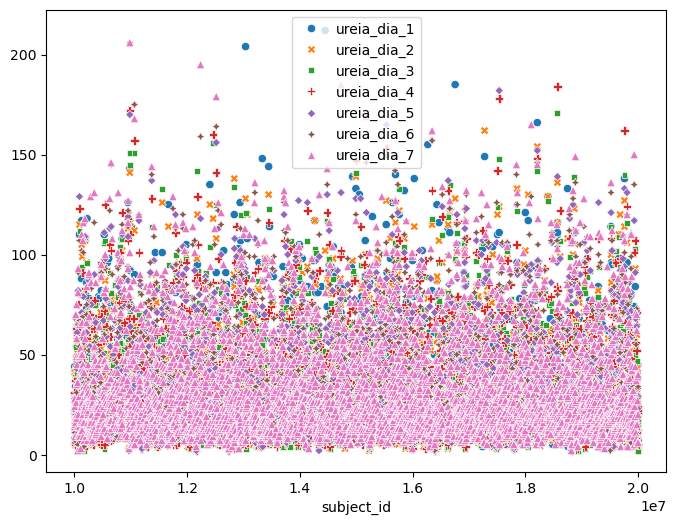

In [43]:
plt.figure(figsize = (8, 6))

### OS PONTOS GERAIS
sns.scatterplot(novo_df_ureia_tratado, legend = "brief")

plt.legend()
plt.show()

#### Gerando a matriz de distâncias de Gower

In [10]:
#["auto", "ball_tree", "kd_tree", "brute"]
nova_lista_de_algoritmo = lista_algoritmo.copy()
nova_lista_de_algoritmo.remove("ball_tree")
nova_lista_de_algoritmo.remove("kd_tree")
nova_lista_de_algoritmo

['auto', 'brute']

In [11]:
distancias_ureia = ajustar_distancias(df_ureia)

In [12]:
modelos = []

for nro_epocas in lista_de_epocas:
    dbscan = Dbscan(epocas = nro_epocas,
                    metrica = "precomputed",
                    nro_threads = -1)
    modelos.append(dbscan)

for modelo in modelos:
    modelo.fit(distancias_ureia)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com época = ", round(modelo._epocas_, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com época =  0.2
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.3
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.4
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.5
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.6
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.7
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.8
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.9
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.0
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.1
Núme

In [9]:
modelos = []

for peso_minimo in lista_peso_minimo:
    dbscan = Dbscan(epocas = 0.8,
                    metrica = "precomputed",
                    peso_minimo = peso_minimo,
                    nro_threads = -1)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(distancias_ureia)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com peso mínimo = ", round(modelo._peso_minimo_, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com peso mínimo =  2
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  3
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  4
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  5
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  6
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  7
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  8
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  9
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  10
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruí

In [10]:
modelos = []

for algoritmo in nova_lista_de_algoritmo:
    for tam_folha in lista_tamanho_folha:
        dbscan = Dbscan(epocas = 0.8,
                        peso_minimo = 5,
                        algoritmo = algoritmo,
                        metrica = "precomputed",
                        tamanho_folha = tam_folha,
                        nro_threads = -1)
        modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(distancias_ureia)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com algoritmo = ", modelo._algoritmo_)
    print("Modelo com tamanho de folha = ", modelo._tamanho_folha_)
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com algoritmo =  auto
Modelo com tamanho de folha =  20
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  30
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  40
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  50
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  brute
Modelo com tamanho de folha =  20
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  brute
Modelo com tamanho de folha =  30
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  brute
Modelo com tamanho de folha =  40
Número estimado  de clusteres: 2
Número estimado de 

#### Imprimindo o resultado dos testes

In [11]:
dbscan = Dbscan(epocas = 0.8,
                peso_minimo = 5,
                metrica = "precomputed",
                algoritmo = "brute",
                nro_threads = -1)

y_dbscan = abs(dbscan.fit_predict(distancias_ureia))

qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
nro_ruidos_ = list(y_dbscan).count(-1)
    
print("Número estimado  de clusteres: %d" % qtd_clusters_)
print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)

Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


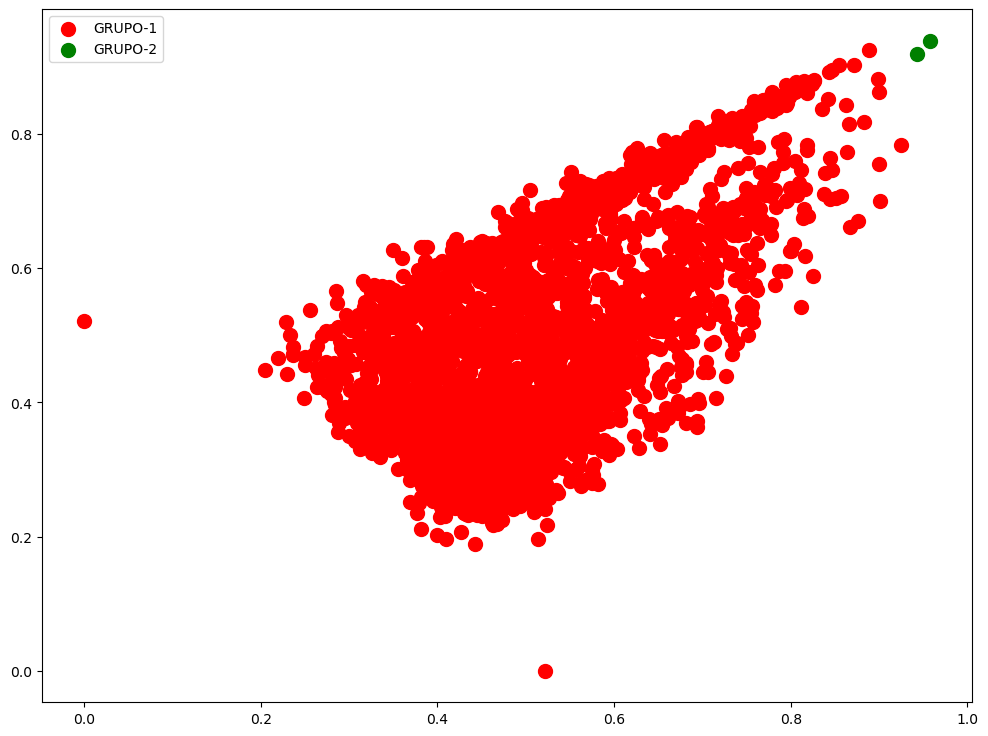

In [12]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(distancias_ureia[y_dbscan == 0, 0], distancias_ureia[y_dbscan == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(distancias_ureia[y_dbscan == 1, 0], distancias_ureia[y_dbscan == 1, 1], s = 100, c = "green", label = "GRUPO-2")

plt.legend()
plt.show()

### DATASET creatinina

#### Removendo valores outliers do dataset e os substituindo por `np.nan`

In [44]:
novo_df_creatinina_tratado = deletar_valores_absurdos(df_creatinina, df_creatinina.max().max())
novo_df_creatinina_tratado.max()

creatinina_dia_1    117.0
creatinina_dia_2     16.0
creatinina_dia_3     15.0
creatinina_dia_4     14.6
creatinina_dia_5     14.7
creatinina_dia_6     15.2
creatinina_dia_7     15.6
dtype: float64

#### Iterando pelo dataset e inserindo dados de dias anteriores em dias posteriores que contém dados nulos

In [45]:
novo_df_creatinina_tratado = preencher_valores_faltantes_linha(novo_df_creatinina_tratado)
novo_df_creatinina_tratado.head(10)

,creatinina_dia_1,creatinina_dia_2,creatinina_dia_3,creatinina_dia_4,creatinina_dia_5,creatinina_dia_6,creatinina_dia_7
subject_id,,,,,,,
10001884,1.1,1.1,1.3,0.9,0.8,0.6,0.5
10004422,0.7,0.7,0.7,0.6,0.6,0.7,0.7
10004733,3.4,3.8,3.7,3.4,2.6,2.6,2.7
10005606,0.7,0.6,0.5,0.4,0.5,0.5,0.5
10010867,0.7,0.7,0.5,0.3,0.4,0.5,0.5
10019777,0.9,0.7,0.9,0.8,0.7,0.6,0.5
10020944,1.4,1.6,1.8,1.6,1.5,1.8,1.6
10023486,3.1,3.4,3.2,3.4,2.8,2.2,1.9
10032381,1.3,1.2,1.2,1.2,1.2,1.2,1.2


In [46]:
novo_df_creatinina_tratado.isna().sum()

creatinina_dia_1    17
creatinina_dia_2     2
creatinina_dia_3     5
creatinina_dia_4     5
creatinina_dia_5     7
creatinina_dia_6    12
creatinina_dia_7    33
dtype: int64

#### Deletando linhas que contém valores nulos - mesmo depois da inserção de dados artificiais

In [48]:
novo_df_creatinina_tratado[novo_df_creatinina_tratado.isna().any(axis = 1)].index

Index([10344732, 10463546, 10477920, 10553635, 10615339, 10996857, 11542534,
       11611745, 11638303, 11663336, 11833476, 12344021, 12374214, 12606435,
       12917345, 12934260, 13679248, 13681485, 13824877, 13827765, 13911200,
       14363068, 14383658, 14623418, 14691603, 14696918, 14785854, 14816630,
       15090519, 15158294, 15204620, 15409850, 15455733, 15583807, 15640315,
       15763754, 15993533, 16327028, 16832227, 17131210, 17327554, 17484283,
       17635990, 17718694, 17803326, 18135694, 18152377, 18560897, 18638524,
       18757959, 19571102, 19571265, 19694231],
      dtype='int64', name='subject_id')

In [49]:
novo_df_creatinina_tratado = novo_df_creatinina_tratado.dropna(axis = 0)
novo_df_creatinina_tratado.isna().sum().sum()

0

In [52]:
modelos = []

for metrica in lista_metrica:
    dbscan = Dbscan(metrica = metrica,
                    nro_threads = -1)
    modelos.append(dbscan)

for modelo in modelos:
    modelo.fit(novo_df_creatinina_tratado)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com métrica = ", modelo._metrica_)
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com métrica =  cityblock
Número estimado  de clusteres: 4
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  cosine
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  euclidean
Número estimado  de clusteres: 6
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  l1
Número estimado  de clusteres: 4
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  l2
Número estimado  de clusteres: 6
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  manhattan
Número estimado  de clusteres: 4
Número estimado de pontos considerados ruídos: 0




In [51]:
modelos = []

for nro_epocas in lista_de_epocas:
    dbscan = Dbscan(epocas = nro_epocas,
                    metrica = "euclidean",
                    nro_threads = -1)
    modelos.append(dbscan)

for modelo in modelos:
    modelo.fit(novo_df_creatinina_tratado)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com época = ", round(modelo._epocas_, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com época =  0.2
Número estimado  de clusteres: 4
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.3
Número estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.4
Número estimado  de clusteres: 4
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.5
Número estimado  de clusteres: 6
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.6
Número estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.7
Número estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.8
Número estimado  de clusteres: 6
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.9
Número estimado  de clusteres: 4
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.0
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.1
Núme

In [54]:
modelos = []

for peso_minimo in lista_peso_minimo:
    dbscan = Dbscan(epocas = 0.5,
                    metrica = "euclidean",
                    peso_minimo = peso_minimo,
                    nro_threads = -1)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(novo_df_creatinina_tratado)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com peso mínimo = ", round(modelo._peso_minimo_, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com peso mínimo =  2
Número estimado  de clusteres: 34
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  3
Número estimado  de clusteres: 12
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  4
Número estimado  de clusteres: 9
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  5
Número estimado  de clusteres: 6
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  6
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  7
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  8
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  9
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  10
Número estimado  de clusteres: 2
Número estimado de pontos considerados r

In [72]:
modelos = []

for algoritmo in lista_algoritmo:
    for tam_folha in lista_tamanho_folha:
        dbscan = Dbscan(epocas = 0.5,
                        peso_minimo = 7,
                        algoritmo = algoritmo,
                        metrica = "euclidean",
                        tamanho_folha = tam_folha,
                        nro_threads = -1)
        modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(novo_df_creatinina_tratado)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com algoritmo = ", modelo._algoritmo_)
    print("Modelo com tamanho de folha = ", modelo._tamanho_folha_)
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com algoritmo =  auto
Modelo com tamanho de folha =  20
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  30
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  40
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  50
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  20
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  30
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  40
Número estimado  de clusteres: 2
Número 

#### Imprimindo o resultado dos testes

In [73]:
dbscan = Dbscan(epocas = 0.5,
                peso_minimo = 7,
                algoritmo = "kd_tree",
                metrica = "euclidean",
                tamanho_folha = 50,
                nro_threads = -1)

y_dbscan = abs(dbscan.fit_predict(novo_df_creatinina_tratado))

qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
nro_ruidos_ = list(y_dbscan).count(-1)
    
print("Número estimado  de clusteres: %d" % qtd_clusters_)
print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)

Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


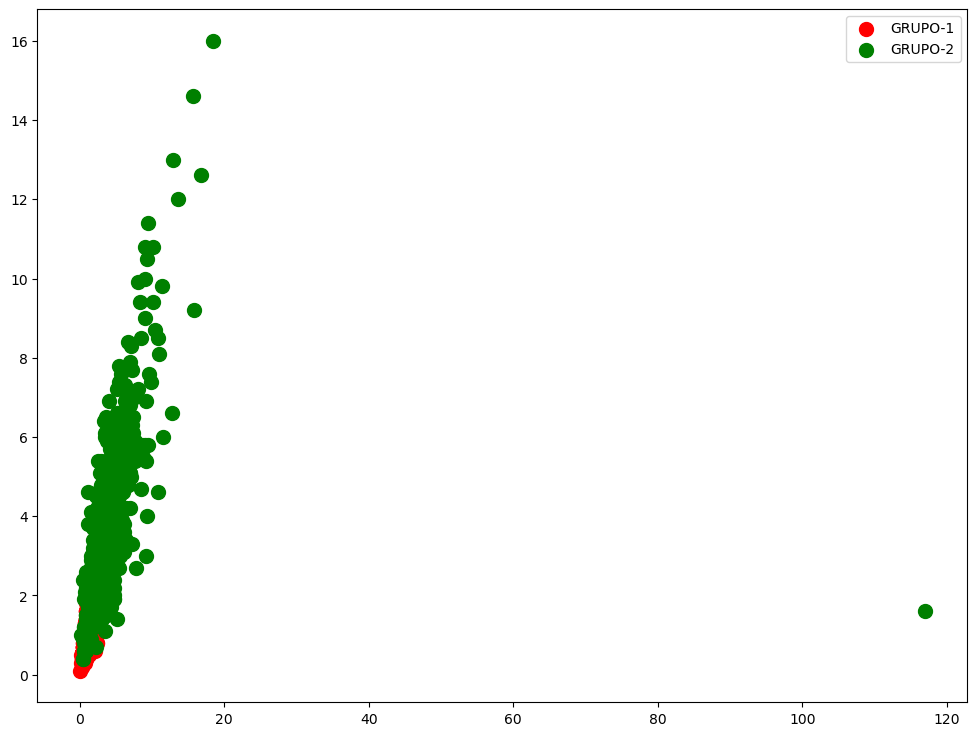

In [74]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(novo_df_creatinina_tratado.values[y_dbscan == 0, 0], novo_df_creatinina_tratado.values[y_dbscan == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(novo_df_creatinina_tratado.values[y_dbscan == 1, 0], novo_df_creatinina_tratado.values[y_dbscan == 1, 1], s = 100, c = "green", label = "GRUPO-2")

plt.legend()
plt.show()

In [70]:
distancias_creatinina = ajustar_distancias(df_creatinina)

In [75]:
modelos = []

for nro_epocas in lista_de_epocas:
    dbscan = Dbscan(epocas = nro_epocas,
                    metrica = "precomputed",
                    nro_threads = -1)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(distancias_creatinina)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com época = ", round(modelo._epocas_, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com época =  0.2
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.3
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.4
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.5
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.6
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.7
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.8
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.9
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.0
Número estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.1
Núme

In [76]:
modelos = []

for peso_minimo in lista_peso_minimo:
    dbscan = Dbscan(epocas = 0.5,
                    peso_minimo = peso_minimo,
                    metrica = "precomputed",
                    nro_threads = -1)
    modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(distancias_creatinina)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com peso mínimo = ", round(modelo._peso_minimo_, 1))
    print("=" * 30)
    print("Númmero estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com peso mínimo =  2
Númmero estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  3
Númmero estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  4
Númmero estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  5
Númmero estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  6
Númmero estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  7
Númmero estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  8
Númmero estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  9
Númmero estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  10
Númmero estimado  de clusteres: 2
Número estimado de pontos conside

In [77]:
modelos = []

for algoritmo in nova_lista_de_algoritmo:
    for tam_folha in lista_tamanho_folha:
        dbscan = Dbscan(epocas = 0.5,
                        peso_minimo = 5,
                        algoritmo = algoritmo,
                        metrica = "precomputed",
                        tamanho_folha = tam_folha,
                        nro_threads = -1)
        modelos.append(dbscan)
    
for modelo in modelos:
    modelo.fit(distancias_creatinina)
    y_dbscan = abs(modelo.getDistanciaAoQuadrado())
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com algoritmo = ", modelo._algoritmo_)
    print("Modelo com tamanho de folha = ", modelo._tamanho_folha_)
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com algoritmo =  auto
Modelo com tamanho de folha =  20
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  30
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  40
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  50
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  brute
Modelo com tamanho de folha =  20
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  brute
Modelo com tamanho de folha =  30
Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  brute
Modelo com tamanho de folha =  40
Número estimado  de clusteres: 2
Número estimado de 

#### Imprimindo o resultado dos testes

In [78]:
dbscan = Dbscan(epocas = 0.5,
                peso_minimo = 5,
                algoritmo = "brute",
                metrica = "precomputed",
                nro_threads = -1)
dbscan.fit(distancias_creatinina)

y_dbscan = abs(dbscan.getDistanciaAoQuadrado())

qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
nro_ruidos_ = list(y_dbscan).count(-1)

print("Número estimado  de clusteres: %d" % qtd_clusters_)
print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)

Número estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


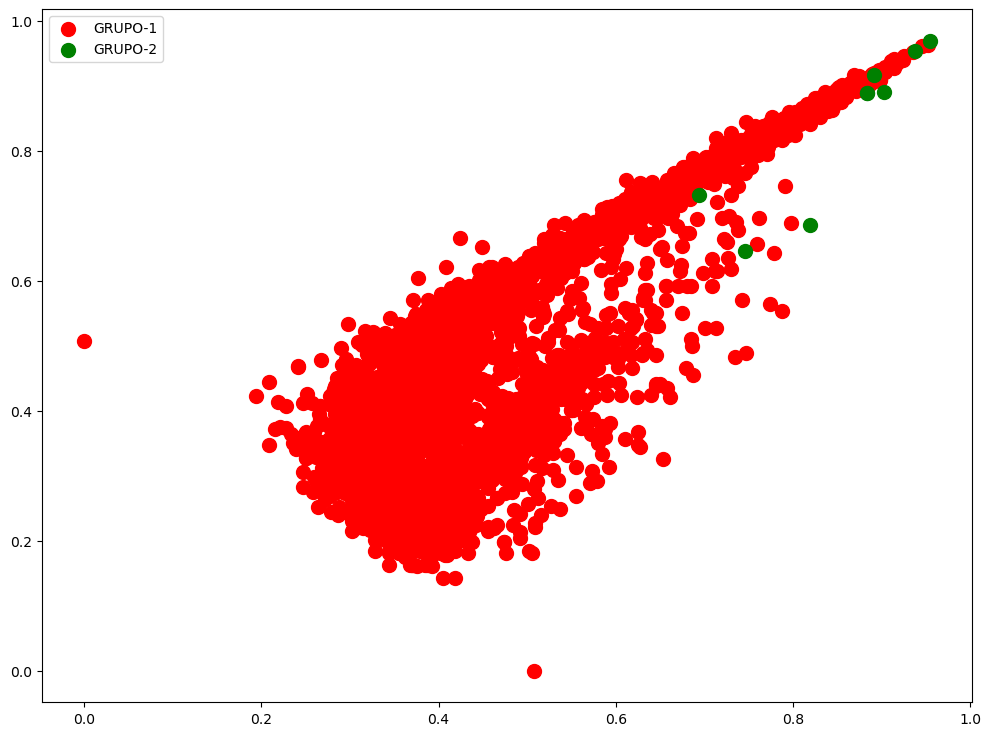

In [79]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(distancias_creatinina[y_dbscan == 0, 0], distancias_creatinina[y_dbscan == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(distancias_creatinina[y_dbscan == 1, 0], distancias_creatinina[y_dbscan == 1, 1], s = 100, c = "green", label = "GRUPO-2")

plt.legend()
plt.show()